In [ ]:
!pip install --upgrade --no-cache-dir git+https://github.com/rongardF/tvdatafeed.git
!pip install yfinance

  Cloning https://github.com/rongardF/tvdatafeed.git to /tmp/pip-req-build-k5t8g8n1
  Running command git clone --filter=blob:none --quiet https://github.com/rongardF/tvdatafeed.git /tmp/pip-req-build-k5t8g8n1
  Resolved https://github.com/rongardF/tvdatafeed.git to commit e6f6aaa7de439ac6e454d9b26d2760ded8dc4923
  Preparing metadata (setup.py) ... done
  Created wheel for tvdatafeed: filename=tvdatafeed-2.1.0-py3-none-any.whl size=17533 sha256=a678fe92c60bf329a246fd75bf20e601b9df8943b21cf3512f3c4ac609540a20
  Stored in directory: /tmp/pip-ephem-wheel-cache-sizyuiv4/wheels/4b/f9/e9/82474a5d9a64702ba7dd5481dee05d267c69bcfa480d382b7c
Successfully built tvdatafeed


In [ ]:
from tvDatafeed import TvDatafeed, Interval
import yfinance as yf
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import numpy as np
from pandas.tseries.offsets import BDay




In [ ]:
from tvDatafeed import TvDatafeed, Interval

username = 'YourTradingViewUsername'
password = 'YourTradingViewPassword'

tv = TvDatafeed(username, password)

ERROR:tvDatafeed.main:error while signin


In [ ]:
nifty_index_data = tv.get_hist(symbol='NIFTY',exchange='NSE',interval=Interval.in_5_minute,n_bars=5000)
nifty_index_data

,symbol,open,high,low,close,volume
datetime,,,,,,
2024-10-01 08:35:00,NSE:NIFTY,25802.55,25806.65,25791.35,25792.90,1837067.0
2024-10-01 08:40:00,NSE:NIFTY,25791.95,25803.45,25788.20,25795.40,1966017.0
2024-10-01 08:45:00,NSE:NIFTY,25795.05,25803.50,25792.90,25795.80,2625298.0
2024-10-01 08:50:00,NSE:NIFTY,25795.45,25797.45,25767.50,25771.90,3612451.0
2024-10-01 08:55:00,NSE:NIFTY,25771.25,25778.05,25766.25,25767.65,3119502.0
...,...,...,...,...,...,...
2025-01-09 05:05:00,NSE:NIFTY,23631.25,23638.45,23626.60,23629.35,2481034.0
2025-01-09 05:10:00,NSE:NIFTY,23628.90,23632.20,23612.90,23617.80,3246130.0
2025-01-09 05:15:00,NSE:NIFTY,23619.10,23621.50,23547.05,23554.40,5821141.0


In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime

nifty_ticker = "^NSEI"
nifty_50 = yf.Ticker(nifty_ticker)
st_date = datetime(2025,1,8)
end_date = datetime(2025,1,9)
data = yf.download(nifty_ticker, start=st_date, end=end_date, interval='1m')
print(data)
nifty_data = nifty_50.history(period="1d", interval="1m")

nifty_close = nifty_data['Close']
nifty_close.index = pd.to_datetime(nifty_close.index)
nifty_close_resampled = nifty_close.resample('5min').mean().interpolate(method='linear')
nifty_close_resampled
data_close = data['Close']
data_close.index = pd.to_datetime(data_close.index)
data_close_resampled = data_close.resample('5min').mean().interpolate(method='linear')
data_close_resampled


[*********************100%***********************]  1 of 1 completed


Price                             Close          High           Low  \
Ticker                            ^NSEI         ^NSEI         ^NSEI   
Datetime                                                              
2025-01-08 03:45:00+00:00  23702.750000  23751.699219  23693.650391   
2025-01-08 03:46:00+00:00  23697.199219  23708.650391  23695.699219   
2025-01-08 03:47:00+00:00  23697.699219  23702.400391  23688.099609   
2025-01-08 03:48:00+00:00  23697.800781  23706.849609  23691.250000   
2025-01-08 03:49:00+00:00  23680.099609  23699.800781  23677.300781   
...                                 ...           ...           ...   
2025-01-08 09:55:00+00:00  23689.250000  23693.150391  23686.949219   
2025-01-08 09:56:00+00:00  23691.849609  23694.699219  23688.050781   
2025-01-08 09:57:00+00:00  23692.300781  23694.949219  23688.750000   
2025-01-08 09:58:00+00:00  23686.900391  23694.750000  23684.349609   
2025-01-08 09:59:00+00:00  23675.199219  23690.449219  23674.199219   

Price

Ticker,^NSEI
Datetime,
2025-01-08 03:45:00+00:00,23695.109766
2025-01-08 03:50:00+00:00,23659.410156
2025-01-08 03:55:00+00:00,23652.359766
2025-01-08 04:00:00+00:00,23640.280469
2025-01-08 04:05:00+00:00,23667.150391
...,...
2025-01-08 09:35:00+00:00,23678.339844
2025-01-08 09:40:00+00:00,23704.049609
2025-01-08 09:45:00+00:00,23690.990234


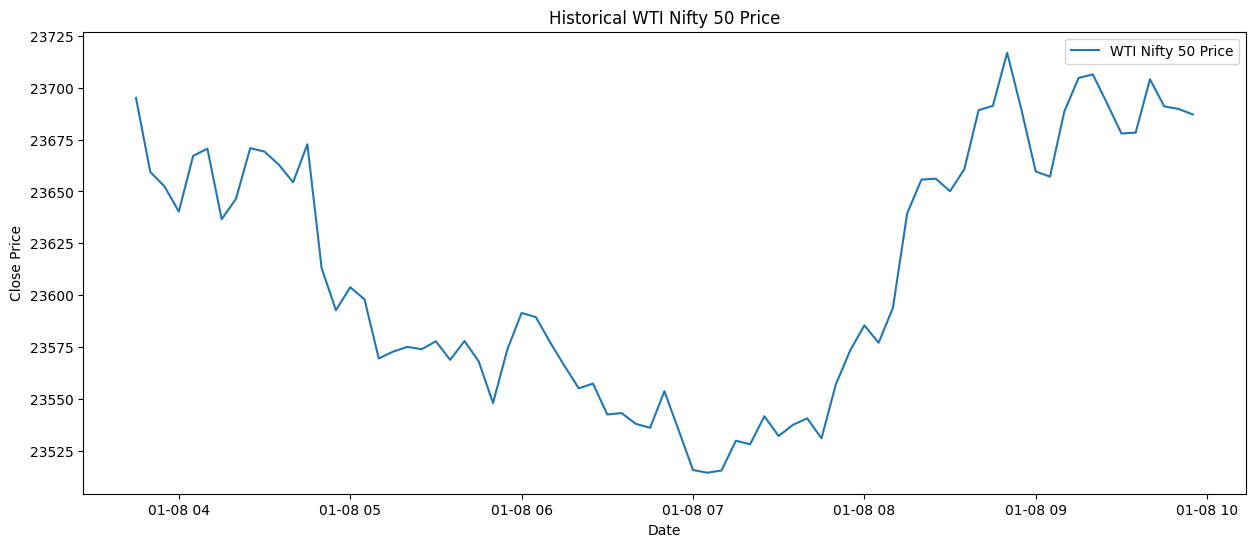

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
# plt.plot(nifty_close_resampled, label='WTI Nifty 50 Price')
plt.plot(data_close_resampled, label='WTI Nifty 50 Price')
plt.xlabel('Date')
# xt = data_close_resampled.index[0::15]
# xt = xt.strftime('%m-%d %H:%M')
# print(xt)
# plt.xticks(xt)
plt.ylabel('Close Price')
plt.title('Historical WTI Nifty 50 Price')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    result = adfuller(timeseries.values.flatten())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

# check_stationarity(nifty_data['Close'])
check_stationarity(data['Close'])
check_stationarity(data_close_resampled)


ADF Statistic: -1.654449
p-value: 0.454721
ADF Statistic: -1.317713
p-value: 0.621030


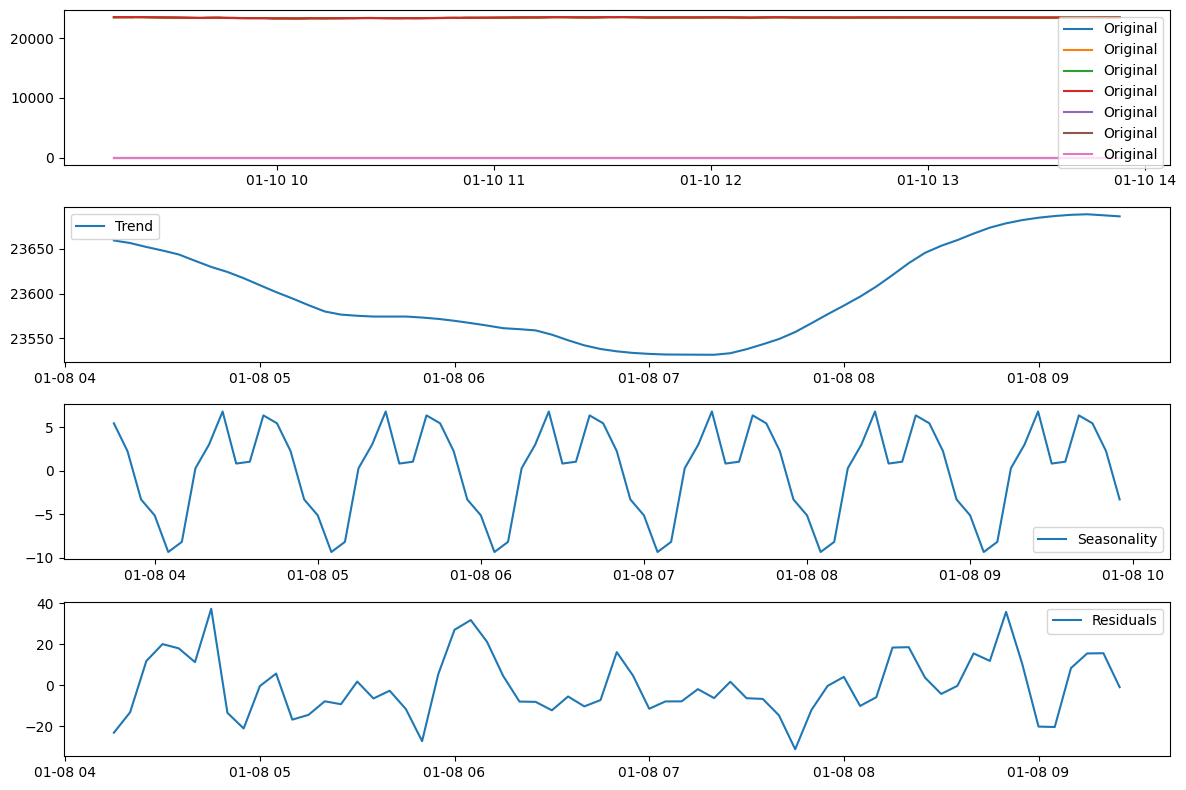

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# decomposition = seasonal_decompose(nifty_close_resampled, model='additive', period=112)
decomposition = seasonal_decompose(data_close_resampled, model='additive',period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(nifty_data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
residual.dropna(inplace=True)
trend.dropna(inplace=True)
seasonal.dropna(inplace=True)

In [ ]:


print(f"ADF test for residual \n {check_stationarity(residual)}\n")
print(f"ADF test for trend \n {check_stationarity(trend)}\n")
print(f"ADF test for seasonal \n {check_stationarity(seasonal)}\n")


ADF Statistic: -5.755952
p-value: 0.000001
ADF test for residual 
 None

ADF Statistic: -0.602788
p-value: 0.870351
ADF test for trend 
 None

ADF Statistic: -3585413865976892.500000
p-value: 0.000000
ADF test for seasonal 
 None



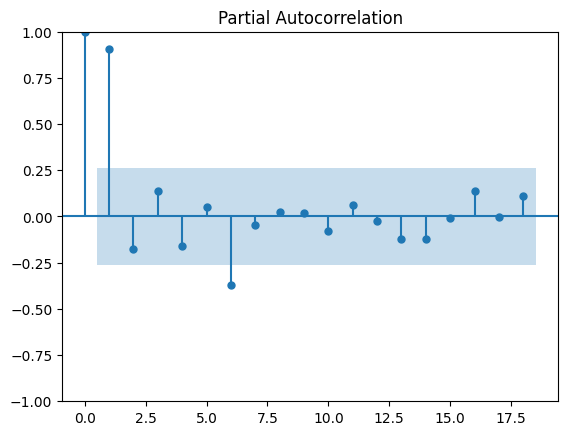

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

plot_pacf(nifty_close_resampled)
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

p = 3
model = ARIMA(residual, order=(p,0,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  resid   No. Observations:                   63
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -248.086
Date:                Fri, 10 Jan 2025   AIC                            506.172
Time:                        08:23:38   BIC                            516.888
Sample:                    01-08-2025   HQIC                           510.387
                         - 01-08-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3422      2.388     -0.143      0.886      -5.023       4.338
ar.L1          0.6414      0.129      4.966      0.000       0.388       0.895
ar.L2         -0.3596      0.179     -2.014      0.044      -0.710      -0.010
ar.L3          0.0141      0.131      0.108      0.914      -0.243       0.271
sigma2       152.8892     25.118      6.087      0.000     103.659     202.119
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.99
Prob(Q):                              0.97   Prob(JB):                         0.14
Heteroskedasticity (H):               0.65   Skew:                             0.31
Prob(H) (two-sided):                  0.33   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

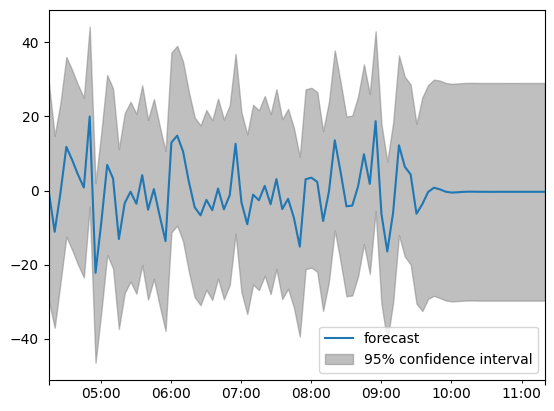

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict

# plot_predict(results, start=0, end=len(nifty_close_resampled)+10)
plot_predict(results, start=0, end=len(data_close_resampled)+10)
plt.show()

<ipython-input-243-3b208c309800>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  future_trend = np.array([trend[-4]] * forecast_steps)  # or a more sophisticated extrapolation
<ipython-input-243-3b208c309800>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  future_seasonal = np.array([seasonal[-1]] * forecast_steps)


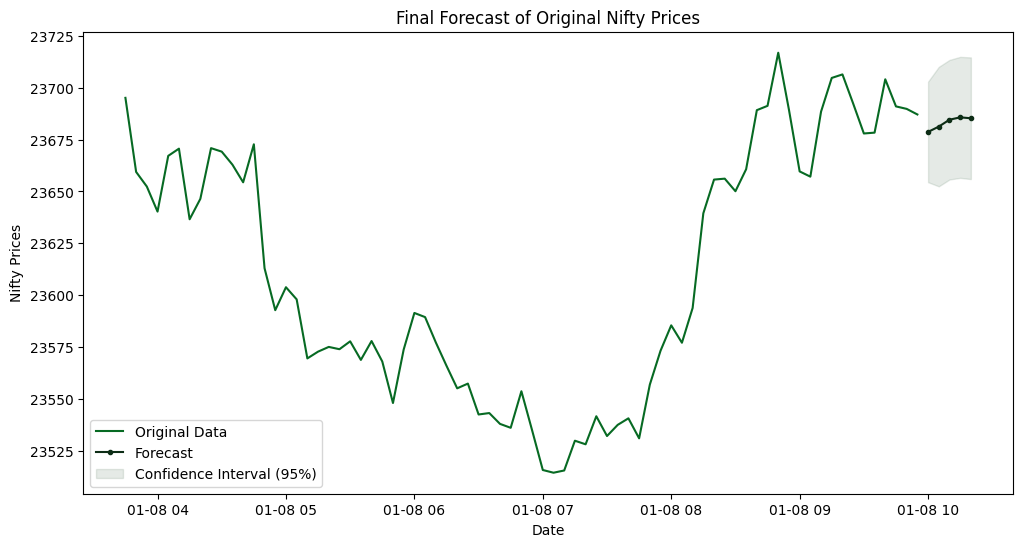

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay

# last_date = nifty_close_resampled.index[-1]
last_date = data_close_resampled.index[-1]
forecast_steps = 5
future_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='5min')[1:]
forecast_values = results.forecast(steps=forecast_steps)
confidence_intervals = results.get_forecast(steps=forecast_steps).conf_int()
forecast_values.index = future_dates
confidence_intervals.index = future_dates


future_trend = np.array([trend[-4]] * forecast_steps)
future_seasonal = np.array([seasonal[-1]] * forecast_steps)

final_forecast = forecast_values + future_trend + future_seasonal

lower_bound = confidence_intervals.iloc[:,0] + future_trend + future_seasonal
upper_bound = confidence_intervals.iloc[:,1] + future_trend + future_seasonal

plt.figure(figsize=(12, 6))
# plt.plot(nifty_close_resampled.index[-300:], nifty_close_resampled[-300:], label='Original Data', color='#076A23')
plt.plot(data_close_resampled.index[-300:], data_close_resampled[-300:], label='Original Data', color='#076A23')
plt.plot(future_dates, final_forecast, label='Forecast', color='#0D2D16', marker='.')
plt.fill_between(future_dates, lower_bound, upper_bound, color='#003910', alpha=0.1, label='Confidence Interval (95%)')
plt.xlabel('Date')
plt.ylabel('Nifty Prices')
plt.title('Final Forecast of Original Nifty Prices')
plt.legend()
plt.show()

In [ ]:
class TSF_AR:
    def __init__(self, symbol):
      self.symbol = symbol
      self.data = None
      self.resampled_data = None
      self.resampled_column  = None
      self.startDate = None
      self.endDate = None
      self.interval = None
      self.forecastDuration = None
      self.resample_freq = None
      self.interpolationMethod = None
      self.stationarizationPeriod = None
      self.stationarizationModel = None
      self.decomposed_data = None
      self.decompositionType = None
      self.p_order = None
      self.ARIMA_model = None
      self.ARIMA_summary = None
      self.forecast_steps = None
      self.forecast_freq = None


    def display_details(self):
      print('data:')
      print(f'\n')
      if self.data is not None:
        # display({self.data})
        print(self.data.to_markdown())
        print(f'\n')
      else:
        print(None)
        print(f'\n')
      print('resampled_data:')
      print(f'\n')
      if self.resampled_data is not None:
        # display({self.resampled_data})
        print(self.resampled_data.to_markdown())
        print(f'\n')
      else:
        print(None)
        print(f'\n')
      print('decomposed_data:')
      print(f'\n')
      if self.decomposed_data is not None:
        # display({self.decomposed_data})
        print(self.decomposed_data.to_markdown())
        print(f'\n')
      else:
        print(None)
        print(f'\n')
      print(f"""symbol: {self.symbol}
            resampled_column: {self.resampled_column}
            startDate: {self.startDate}
            endDate: {self.endDate}
            interval: {self.interval}
            forecastDuration: {self.forecastDuration}
            resample_freq: {self.resample_freq}
            interpolationMethod: {self.interpolationMethod}
            stationarizationPeriod: {self.stationarizationPeriod}
            stationarizationModel: {self.stationarizationModel}
            decompositionType: {self.decompositionType}
            p_order: {self.p_order}
            ARIMA_model: {self.ARIMA_model}
            ARIMA_summary: {self.ARIMA_summary}
            forecast_steps: {self.forecast_steps}
            forecast_freq: {self.forecast_freq}""")

    def download_data(self, startDate, endDate, interval):
      self.startDate = startDate
      self.endDate = endDate
      self.interval = interval
      ticker = self.symbol
      sD = datetime.strptime(startDate, '%Y-%m-%d').date()
      eD = datetime.strptime(endDate, '%Y-%m-%d').date()
      interval = interval
      data = yf.download(ticker, start=sD, end=eD, interval=interval)
      print(data.to_markdown())
      self.data = data

    def data_plotter(self):
      plt.figure(figsize=(15,6))
      plt.plot(self.resampled_data, label=f'{self.symbol} Price')
      plt.xlabel('Date')
      plt.ylabel('Close Price')
      plt.title(f'Historical {self.symbol} Price')
      plt.legend()
      plt.show()

    def get_data(self):
      return self.data

    def get_resampled_data(self):
      return self.resampled_data

    def dataResampler(self, resample_column ,resample_freq, interpolationMethod):
      self.resample_freq = resample_freq
      self.interpolationMethod = interpolationMethod
      data_col = self.data[resample_column]
      data_col.index = pd.to_datetime(data_col.index)
      resampled_data = data_col.resample(resample_freq).mean().interpolate(method=interpolationMethod)
      print(resampled_data)
      self.resampled_data = resampled_data
      self.resampled_column = resample_column

    def stationarity_check(self, timeseries):
      result = adfuller(timeseries.values.flatten())
      print(f""" Null Hypothesis: The time-series is non-stationary.(Statistical properties are not constant over time.)
                 If p-value is lower than 0.05, we can reject the null hypothesis, the time-series is stationary.
                 If absolute ADF Statistic is above 3.5, then we can reject the null hypothesis, the time-series is stationary.""")
      print('ADF Statistic: %f' % result[0])
      print('p-value: %f' % result[1])

    def stationarize(self, stationarizationValues ,stationarizationPeriod, stationarizationModel):
      self.stationarizationPeriod = stationarizationPeriod
      self.stationarizationModel = stationarizationModel
      decomposition = seasonal_decompose(stationarizationValues, model=stationarizationModel,period=stationarizationPeriod)

      trend = decomposition.trend
      seasonal = decomposition.seasonal
      residual = decomposition.resid

      trend.dropna(inplace=True)
      seasonal.dropna(inplace=True)
      residual.dropna(inplace=True)


      plt.figure(figsize=(12,8))
      plt.subplot(411)
      plt.plot(stationarizationValues, label='Original')
      plt.legend(loc='best')
      plt.show()
      print('Original')
      self.stationarity_check(stationarizationValues)
      print(f"\n\n")
      plt.figure(figsize=(12,8))
      plt.subplot(412)
      plt.plot(trend, label='Trend')
      plt.legend(loc='best')
      plt.show()
      print('Trend')
      self.stationarity_check(trend)
      print(f"\n\n")
      plt.figure(figsize=(12,8))
      plt.subplot(413)
      plt.plot(seasonal,label='Seasonal')
      plt.legend(loc='best')
      plt.show()
      print('Seasonal')
      self.stationarity_check(seasonal)
      print(f"\n\n")
      plt.figure(figsize=(12,8))
      plt.subplot(414)
      plt.plot(residual, label='Residual')
      plt.legend(loc='best')
      plt.show()
      print('Residual')
      self.stationarity_check(residual)
      print(f"\n\n")
      plt.tight_layout()
      plt.show()


      print('Enter the decompositionType:')
      decompositionType = input()

      if decompositionType == 'Residual':
        self.decomposed_data = residual
        self.decompositionType = 'Residual'
      elif decompositionType == 'Seasonal':
        self.decomposed_data = seasonal
        self.decompositionType = 'Seasonal'
      elif decompositionType == 'Trend':
        self.decomposed_data = trend
        self.decompositionType = 'Trend'
      else:
        print('Invalid input: select from [Residual, Seasonal, Trend]')
        self.stationarize(stationarizationValues, stationarizationPeriod, stationarizationModel)

    def PACF_plotter(self, pacfValues):
      plot_pacf(pacfValues)
      plt.show()
      print('Enter the order for ARIMA:')
      p_order = input()
      if p_order.isnumeric() and '.' not in p_order:
        self.p_order =int(p_order)
      else:
        print('Invalid input: enter an Integer number')
        self.PACF_plotter(pacfValues)



    def ARIMA_fitter(self,p_order=None, dataset=None):
      if p_order is None:
        p = self.p_order
      else:
        p = p_order
      if dataset is None:
        dataset = self.decomposed_data
      else:
        dataset = dataset
      print('p',type(p))
      model = ARIMA(dataset, order=(p,0,0))
      self.ARIMA_model = model.fit()
      self.ARIMA_summary = self.ARIMA_model.summary()


    def ARIMA_predict_plotter(self,predict_step, dataset=None):
      if dataset is None:
        dataset = self.decomposed_data
      else:
        dataset = dataset

      fig = plot_predict(self.ARIMA_model, start=0, end=len(dataset)+predict_step)
      fig.set_size_inches(12, 4)


    def ARIMA_forecast(self,forecast_steps, forecast_freq):
      self.forecast_steps = forecast_steps
      self.forecast_freq = forecast_freq








[*********************100%***********************]  1 of 1 completed

data:


None


resampled_data:


None


decomposed_data:


None


symbol: ^NSEI
            resampled_column: None
            startDate: None
            endDate: None
            interval: None
            forecastDuration: None
            resample_freq: None
            interpolationMethod: None
            stationarizationPeriod: None
            stationarizationModel: None
            decompositionType: None
            p_order: None
            ARIMA_model: None
            ARIMA_summary: None
            forecast_steps: None
            forecast_freq: None
| Datetime                  |   ('Close', '^NSEI') |   ('High', '^NSEI') |   ('Low', '^NSEI') |   ('Open', '^NSEI') |   ('Volume', '^NSEI') |
|:--------------------------|---------------------:|--------------------:|-------------------:|--------------------:|----------------------:|
| 2025-01-09 03:45:00+00:00 |              23618.2 |             23682.4 |            23614.3 |             23682.4 |                     0 |
| 2

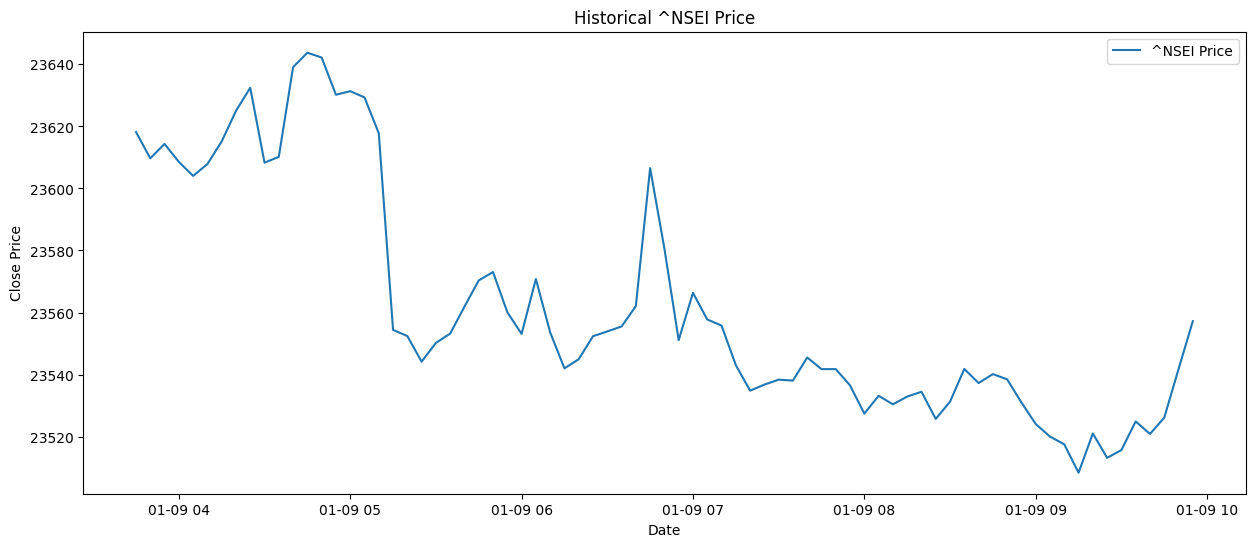

 Null Hypothesis: The time-series is non-stationary.(Statistical properties are not constant over time.)
                 If p-value is lower than 0.05, we can reject the null hypothesis, the time-series is stationary.
                 If absolute ADF Statistic is above 3.5, then we can reject the null hypothesis, the time-series is stationary.
ADF Statistic: -1.904456
p-value: 0.329968


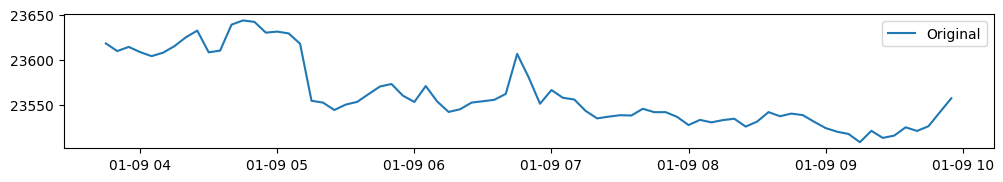

Original
 Null Hypothesis: The time-series is non-stationary.(Statistical properties are not constant over time.)
                 If p-value is lower than 0.05, we can reject the null hypothesis, the time-series is stationary.
                 If absolute ADF Statistic is above 3.5, then we can reject the null hypothesis, the time-series is stationary.
ADF Statistic: -1.904456
p-value: 0.329968





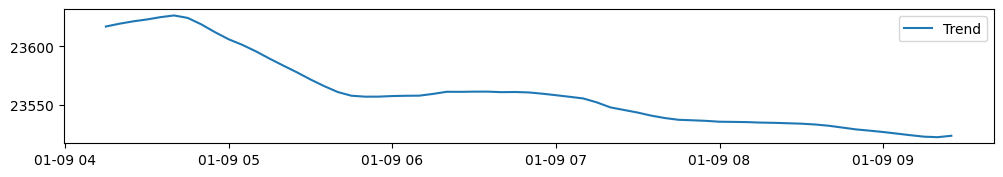

Trend
 Null Hypothesis: The time-series is non-stationary.(Statistical properties are not constant over time.)
                 If p-value is lower than 0.05, we can reject the null hypothesis, the time-series is stationary.
                 If absolute ADF Statistic is above 3.5, then we can reject the null hypothesis, the time-series is stationary.
ADF Statistic: -3.267179
p-value: 0.016411





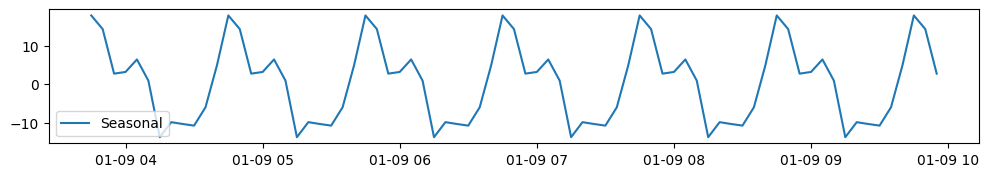

Seasonal
 Null Hypothesis: The time-series is non-stationary.(Statistical properties are not constant over time.)
                 If p-value is lower than 0.05, we can reject the null hypothesis, the time-series is stationary.
                 If absolute ADF Statistic is above 3.5, then we can reject the null hypothesis, the time-series is stationary.
ADF Statistic: -3616073168190619.500000
p-value: 0.000000





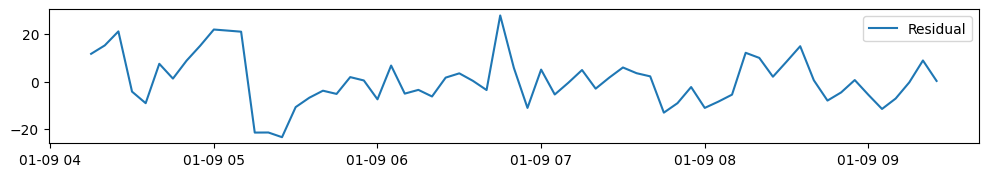

Residual
 Null Hypothesis: The time-series is non-stationary.(Statistical properties are not constant over time.)
                 If p-value is lower than 0.05, we can reject the null hypothesis, the time-series is stationary.
                 If absolute ADF Statistic is above 3.5, then we can reject the null hypothesis, the time-series is stationary.
ADF Statistic: -5.313311
p-value: 0.000005





<Figure size 640x480 with 0 Axes>

Enter the decompositionType:
Trend
data:


| Datetime                  |   ('Close', '^NSEI') |   ('High', '^NSEI') |   ('Low', '^NSEI') |   ('Open', '^NSEI') |   ('Volume', '^NSEI') |
|:--------------------------|---------------------:|--------------------:|-------------------:|--------------------:|----------------------:|
| 2025-01-09 03:45:00+00:00 |              23618.2 |             23682.4 |            23614.3 |             23682.4 |                     0 |
| 2025-01-09 03:50:00+00:00 |              23609.7 |             23622.2 |            23607.8 |             23616.6 |                     0 |
| 2025-01-09 03:55:00+00:00 |              23614.3 |             23621.3 |            23601.7 |             23611.2 |                     0 |
| 2025-01-09 04:00:00+00:00 |              23608.6 |             23630.9 |            23594.1 |             23613.7 |                     0 |
| 2025-01-09 04:05:00+00:00 |              23604.1 |             23620.2 |            23601.8 |          

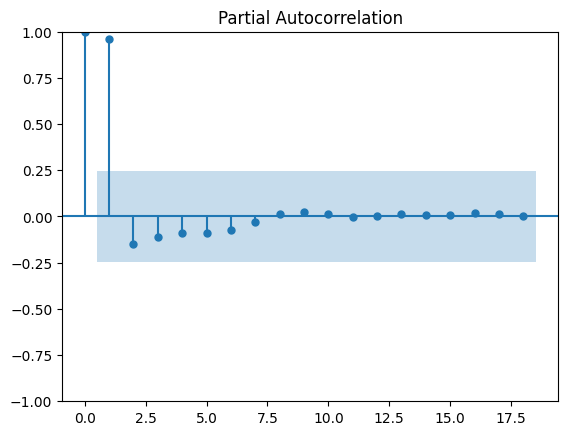

Enter the order for ARIMA:
2
data:


| Datetime                  |   ('Close', '^NSEI') |   ('High', '^NSEI') |   ('Low', '^NSEI') |   ('Open', '^NSEI') |   ('Volume', '^NSEI') |
|:--------------------------|---------------------:|--------------------:|-------------------:|--------------------:|----------------------:|
| 2025-01-09 03:45:00+00:00 |              23618.2 |             23682.4 |            23614.3 |             23682.4 |                     0 |
| 2025-01-09 03:50:00+00:00 |              23609.7 |             23622.2 |            23607.8 |             23616.6 |                     0 |
| 2025-01-09 03:55:00+00:00 |              23614.3 |             23621.3 |            23601.7 |             23611.2 |                     0 |
| 2025-01-09 04:00:00+00:00 |              23608.6 |             23630.9 |            23594.1 |             23613.7 |                     0 |
| 2025-01-09 04:05:00+00:00 |              23604.1 |             23620.2 |            23601.8 |             236

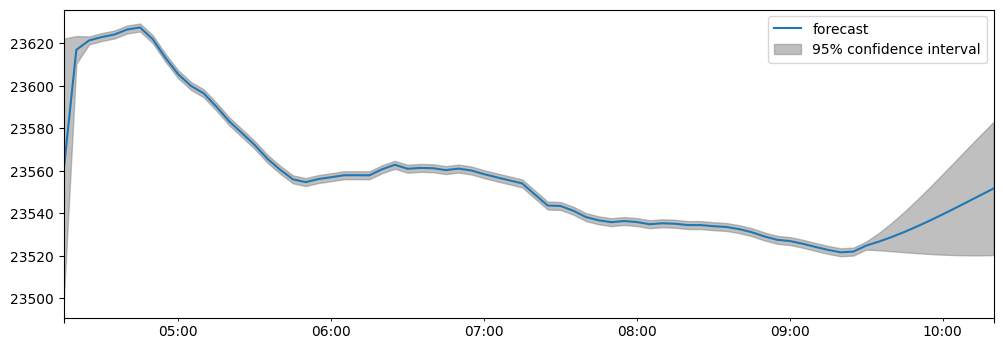

In [ ]:

a = TSF_AR('^NSEI')
a.download_data('2025-1-9','2025-1-10','5m')
a.dataResampler('Close','5min','linear')
a.display_details()
a.data_plotter()


In [ ]:

a.stationarity_check(a.resampled_data)
a.stationarize(a.resampled_data, 12, 'additive')
a.PACF_plotter(a.decomposed_data)
a.display_details()


In [ ]:

a.ARIMA_fitter()
a.display_details()


In [ ]:

a.ARIMA_predict_plotter(10)
